In [2]:
from sage.all import *
import numpy as np

In [27]:
def cl_bondy_chvatal(G):
    closed = True
    while closed:
        closed = False
        n = G.order()
        nonadj = [(u,v) for u in G.vertices() for v in G.vertices() if u<v and not G.has_edge(u,v)]
        for u, v in nonadj:
            print(len(G.vertices()), G.degree(u) + G.degree(v))
            if G.degree(u) + G.degree(v) >= n:
                G.add_edge(u,v)
                closed = True
    return G

In [4]:
def invert_mapping(d):
    inv = {}
    for key,color in d.items():
        inv.setdefault(color, []).append(key)
    return inv

In [5]:
def N_k_n(k,n):
    if n<2*k:
        raise ValueError("n-2k<0")
    G1 = graphs.CompleteGraph(k)
    H1 = graphs.CompleteGraph(n-2*k)
    H2 = Graph()
    V_H2 = list(range(1,k+1))
    H2.add_vertices(V_H2)
    H = H1.disjoint_union(H2)
    G = G1.join(H)
    #print("H vertices: ", H.vertices())
    #print("G vertices: ", G.vertices())
    #print("G edges: ",G.edges())
    #print("H edges: ",H.edges())
    
    
    vertex_colors = {}
    edge_colors = {}
    vertices = []
    edges = []
    for v in G.vertices():
        a,b = v
        #print("v: ", v, "b: ",b)
        if type(b) is int:
            vertex_colors[v] = "blue"
            vertices.append("G1")
        else:
            c,d = b
            if c==0:
                vertex_colors[v] = "gray"
                vertices.append("H1")
            else:
                vertex_colors[v] = "black"
                vertices.append("H2")
        #print("color: ", vertex_colors[v])
    
    for e in G.edges(labels=False):
        u,v = e
        if vertex_colors[u] == vertex_colors[v]:
            if vertex_colors[u] == "gray":
                edge_colors[e] = 'pink'
            else:
                edge_colors[e] = 'green'     
        else:
            edge_colors[e] = 'gray' 
    #print("vertex_colors: ", vertex_colors, "edge colors: ", edge_colors)
    return G, vertex_colors, edge_colors

In [6]:
def L_k_n(k,n):
    if n<k+1:
        raise ValueError("n-k-1<0")
    G1 = graphs.CompleteGraph(1)
    G2 = graphs.CompleteGraph(k)
    G3 = graphs.CompleteGraph(n-k-1)
    H = Graph.disjoint_union(G2, G3)
    return G1.join(H)

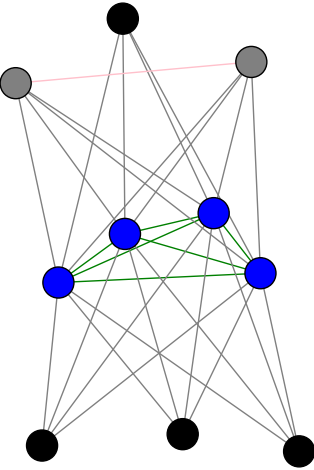

In [7]:
G, vertex_colors, edge_colors = N_k_n(4, 10)
plot_obj = G.plot(vertex_size=500, vertex_colors=invert_mapping(vertex_colors), edge_colors=invert_mapping(edge_colors), layout='spring', vertex_labels=False)
plot_obj.show()

In [8]:
def L_k_n(k, n):
    G1 = Graph(1) #pink
    H1 = graphs.CompleteGraph(k) #black
    H2 = graphs.CompleteGraph(n-k-1) #gray
    H = H1.disjoint_union(H2)
    G = G1.join(H)
    #print("H vertices: ", H.vertices(), "G vertices: ", G.vertices())
    #print("H edges: ", H.edges(), "G edges: ", G.edges())
    vertex_colors = {}
    edge_colors = {}
    
    for v in G.vertices():
        a,b = v
        if type(b) is int:
            vertex_colors[v] = 'pink'
        else:
            c,d =b
            if c ==0:
                vertex_colors[v] = 'black'
            else:
                vertex_colors[v] = 'gray'
    for e in G.edges(labels=False):
        u,v = e
        if vertex_colors[u] == vertex_colors[v]:
            if vertex_colors[u] == 'black':
                edge_colors[e] = 'black'
            else:
                edge_colors[e] = 'gray'     
        else:
            edge_colors[e] = 'red' 
               
    #print(vertex_colors)
    #print(edge_colors)
    
    return G, vertex_colors, edge_colors

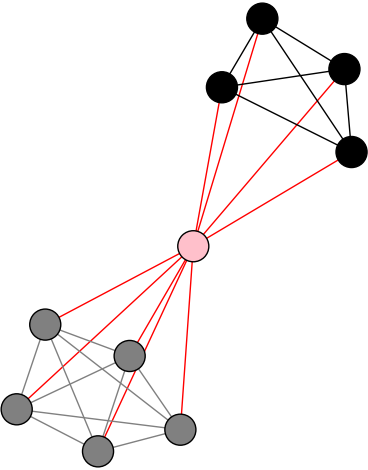

In [9]:
L, vertex_colors, edge_colors = L_k_n(4, 10)
plot_2 = L.plot(vertex_size=500, vertex_colors=invert_mapping(vertex_colors), edge_colors=invert_mapping(edge_colors), layout='spring', vertex_labels=False)
plot_2.show()

In [10]:
def L_k_n_bar(k, n):
    H1 = graphs.CompleteGraph(k) #black
    H2 = graphs.CompleteGraph(n-k-1) #gray
    H = H1.disjoint_union(H2)
    G = H
    #print("H vertices: ", H.vertices(), "G vertices: ", G.vertices())
    #print("H edges: ", H.edges(), "G edges: ", G.edges())
    vertex_colors = {}
    edge_colors = {}
    
    for v in G.vertices():
        a,b = v
        if type(b) is int:
            vertex_colors[v] = 'pink'
        else:
            c,d =b
            if c ==0:
                vertex_colors[v] = 'black'
            else:
                vertex_colors[v] = 'gray'
    for e in G.edges(labels=False):
        u,v = e
        if vertex_colors[u] == vertex_colors[v]:
            if vertex_colors[u] == 'black':
                edge_colors[e] = 'black'
            else:
                edge_colors[e] = 'gray'     
        else:
            edge_colors[e] = 'red' 
               
    #print(vertex_colors)
    #print(edge_colors)
    
    return G, vertex_colors, edge_colors

In [11]:
def N_k_n_bar(k,n):
    if n<2*k+1:
        raise ValueError("n-2k-1<0")
    G1 = graphs.CompleteGraph(k)
    H1 = graphs.CompleteGraph(n-2*k-1)
    H2 = Graph()
    V_H2 = list(range(1,k+2))
    H2.add_vertices(V_H2)
    H = H1.disjoint_union(H2)
    G = G1.join(H)
    #print("H vertices: ", H.vertices())
    #print("G vertices: ", G.vertices())
    #print("G edges: ",G.edges())
    #print("H edges: ",H.edges())
    
    
    vertex_colors = {}
    edge_colors = {}
    vertices = []
    edges = []
    for v in G.vertices():
        a,b = v
        #print("v: ", v, "b: ",b)
        if type(b) is int:
            vertex_colors[v] = "blue"
            vertices.append("G1")
        else:
            c,d = b
            if c==0:
                vertex_colors[v] = "gray"
                vertices.append("H1")
            else:
                vertex_colors[v] = "black"
                vertices.append("H2")
        #print("color: ", vertex_colors[v])
    
    for e in G.edges(labels=False):
        u,v = e
        if vertex_colors[u] == vertex_colors[v]:
            if vertex_colors[u] == "gray":
                edge_colors[e] = 'pink'
            else:
                edge_colors[e] = 'green'     
        else:
            edge_colors[e] = 'gray' 
    #print("vertex_colors: ", vertex_colors, "edge colors: ", edge_colors)
    return G, vertex_colors, edge_colors

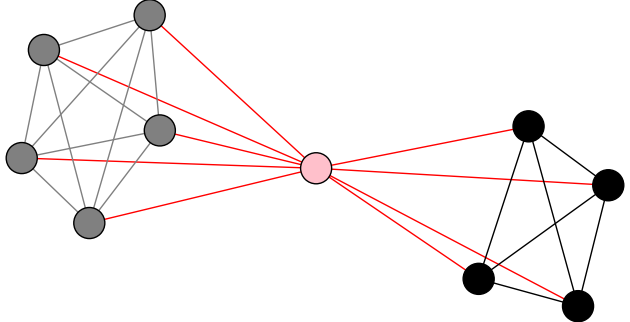

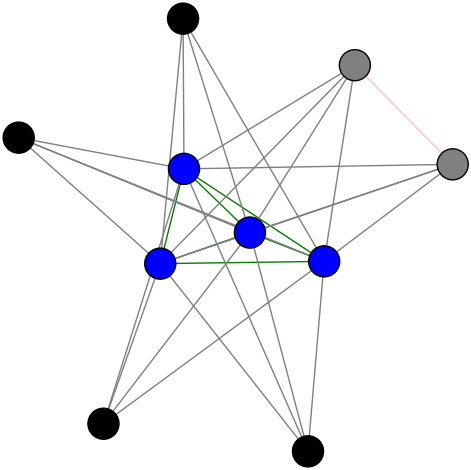

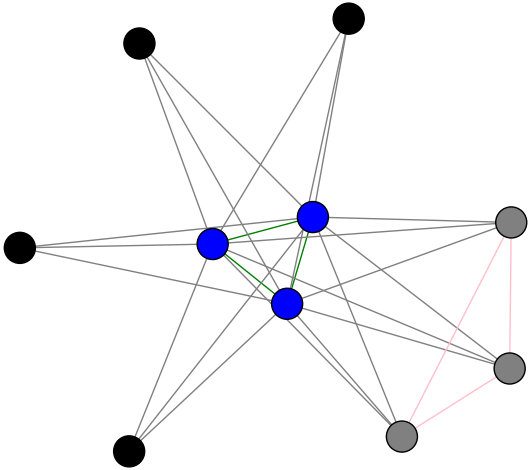

In [34]:
L, vertex_colors1, edge_colors1 = L_k_n(4, 10)
plot_1 = L.plot(vertex_size=500, vertex_colors=invert_mapping(vertex_colors1), edge_colors=invert_mapping(edge_colors1), layout='spring', vertex_labels=False)
plot_1.show()
N, vertex_colors2, edge_colors2 = N_k_n(4, 10)
plot_2 = N.plot(vertex_size=500, vertex_colors=invert_mapping(vertex_colors2), edge_colors=invert_mapping(edge_colors2), layout='spring', vertex_labels=False)
plot_2.show()
Nb, vertex_colors3, edge_colors3 = N_k_n_bar(3, 10)
plot_3 = Nb.plot(vertex_size=500, vertex_colors=invert_mapping(vertex_colors3), edge_colors=invert_mapping(edge_colors3), layout='spring', vertex_labels=False)
plot_3.show()

In [13]:
def cond_erdos_ham(G,n,k):
    #on suppose delta(G) geq k
    if k > (n-1)/2:
        raise ValueError("k>(n-1)/2")
    else:
        cond_erdos = len(G.edges())>np.max(binomial(n-k, 2)+k**2, binomial(ceil((n+1)/2),2)+floor((n-1)/2)**2)
        return cond_erdos

11
11 11
11 12
11 13
11 14
11 12
11 13
11 14
11 15
11 14
11 15
11 16
11 16
11 17
11 18
new []


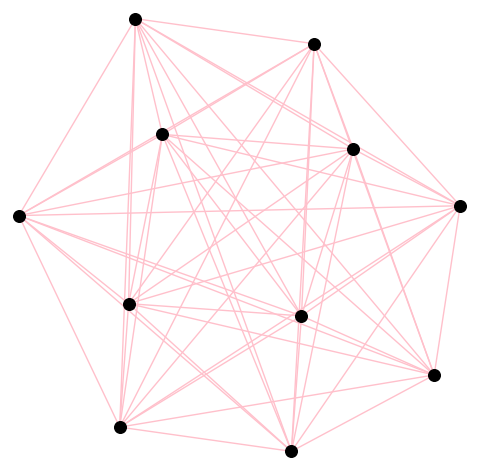

In [41]:
def cl_plot(G):
    G_ = cl_bondy_chvatal(G)
    edge_colors={}
    print('new', list(set(G_.edges()).difference(G.edges())))
    for e in G_.edges():
        if e in G.edges():
            edge_colors[e] = 'pink'
        else:
            edge_colors[e]='blue'
    return G_, edge_colors

G.add_vertices(vertices)
G2 = N.join(G)

print(len(G2.vertices()))
G_, edge_colors = cl_plot(G2)
plot_cl = G_.plot(vertex_size=70, vertex_color = 'black', edge_colors=invert_mapping(edge_colors), layout='spring', vertex_labels=False)
plot_cl.show()
        